In [8]:
# Data Processing
import pandas as pd
import numpy as np

# Modelling
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz
import matplotlib.pyplot as plt

## Import dataset

In [2]:
df = pd.read_csv('../data/loan_data.csv')
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [9]:
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [62]:
age = df[['person_age']]
age.head()

,person_age
0,22.0
1,21.0
2,25.0
3,23.0
4,24.0


# Find anomaly


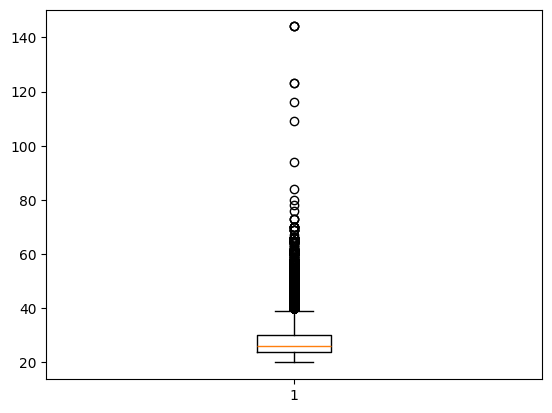

In [69]:
# Boxplot:
plt.boxplot(df[['person_age']])
plt.show()

In [70]:
# Isolation forest
model = IsolationForest(n_estimators=100, max_samples=256, contamination=float(0.0005), random_state=42)
model.fit(df[['person_age']])

IsolationForest(contamination=0.0005, max_samples=256, random_state=42)

In [71]:
df['scores']=model.decision_function(df[['person_age']])
df['anomaly']=model.predict(df[['person_age']])
df[['person_age', 'scores', 'anomaly']].head()

,person_age,scores,anomaly
0,22.0,0.325942,1
1,21.0,0.191301,1
2,25.0,0.357275,1
3,23.0,0.355623,1
4,24.0,0.361822,1


In [74]:
anomaly=df[['person_age', 'scores','anomaly']].loc[df['anomaly']==-1]
anomaly_index=list(anomaly.index)
print(anomaly)

       person_age    scores  anomaly
81          144.0 -0.003305       -1
183         144.0 -0.003305       -1
575         123.0 -0.003305       -1
747         123.0 -0.003305       -1
32297       144.0 -0.003305       -1
32416        94.0 -0.003305       -1
37930       116.0 -0.003305       -1
38113       109.0 -0.003305       -1


In [79]:
outliers_counter = len(df[df['person_age'] > 100])
outliers_counter

7

In [80]:
print("Accuracy percentage:", 100*list(df['anomaly']).count(-1)/(outliers_counter))

Accuracy percentage: 114.28571428571429


In [81]:
# Merge data
df = df.loc[df['anomaly']!=-1]
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status,scores,anomaly
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1,0.325942,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0,0.191301,1
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1,0.357275,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1,0.355623,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1,0.361822,1


In [83]:
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status,scores,anomaly
count,44992.000000,4.499200e+04,44992.000000,44992.000000,44992.000000,44992.000000,44992.000000,44992.000000,44992.000000,44992.000000,44992.0
mean,27.746955,7.990956e+04,5.392959,9583.245288,11.006448,0.139735,5.866087,632.582592,0.222262,0.319263,1.0
std,5.901543,6.332239e+04,5.917871,6314.856103,2.979019,0.087207,3.875930,50.398623,0.415771,0.058208,0.0
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000,0.000000,1.0
25%,24.000000,4.719725e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000,0.305253,1.0
50%,26.000000,6.704600e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000,0.337873,1.0
75%,30.000000,9.577900e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000,0.355623,1.0
max,84.000000,2.448661e+06,62.000000,35000.000000,20.000000,0.660000,30.000000,784.000000,1.000000,0.361822,1.0


## Classification task  
HOW CAN WE AUTOMATICALLY PROVIDE THE APPROVAL FOR THE POTENTIAL APPLICANTS?